# Domain Analysis

1. Domain Overview: The analysis of global black money involves understanding illicit financial flows that evade taxation, regulations, and often stem from illegal activities. It covers the movement of undeclared, untaxed funds across borders, involving both individuals and corporations.
2. This notebook presents a detailed analysis of the Global Black Money Transactions Dataset. The dataset contains information on financial transactions involving black money, encompassing various countries, industries, and transaction types. The objective of this analysis is to identify patterns, trends, and anomalies through a series of visualizations and statistical methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
from plotly import graph_objects as go
import warnings
# Set visual aesthetics for plots
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
file_path = 'Big_Black_Money_Dataset.csv'
data = pd.read_csv(file_path)
# Display the first few rows of the dataset
data.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [3]:
# Display column names to understand the structure of the dataset
data.columns

Index(['Transaction ID', 'Country', 'Amount (USD)', 'Transaction Type',
       'Date of Transaction', 'Person Involved', 'Industry',
       'Destination Country', 'Reported by Authority', 'Source of Money',
       'Money Laundering Risk Score', 'Shell Companies Involved',
       'Financial Institution', 'Tax Haven Country'],
      dtype='object')

# Check Data Types and Missing Values

In [4]:
# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

# Defined Summary Statistics

In [5]:
# Get summary statistics for numerical columns
data.describe()

,Amount (USD),Money Laundering Risk Score,Shell Companies Involved
count,1.000000e+04,10000.000000,10000.000000
mean,2.501818e+06,5.526400,4.469400
std,1.424364e+06,2.893603,2.879773
min,1.003180e+04,1.000000,0.000000
25%,1.279005e+06,3.000000,2.000000
50%,2.501310e+06,6.000000,4.000000
75%,3.722416e+06,8.000000,7.000000
max,4.999812e+06,10.000000,9.000000


# Missing Values

In [6]:
# Check for missing values in the dataset
data.isnull().sum()

Transaction ID                 0
Country                        0
Amount (USD)                   0
Transaction Type               0
Date of Transaction            0
Person Involved                0
Industry                       0
Destination Country            0
Reported by Authority          0
Source of Money                0
Money Laundering Risk Score    0
Shell Companies Involved       0
Financial Institution          0
Tax Haven Country              0
dtype: int64

# Count Unique values

In [7]:
# Count unique values in each column
data.nunique()

Transaction ID                 10000
Country                           10
Amount (USD)                   10000
Transaction Type                   5
Date of Transaction            10000
Person Involved                 6320
Industry                           7
Destination Country               10
Reported by Authority              2
Source of Money                    2
Money Laundering Risk Score       10
Shell Companies Involved          10
Financial Institution            499
Tax Haven Country                  6
dtype: int64

# Distribution of Transaction Amounts

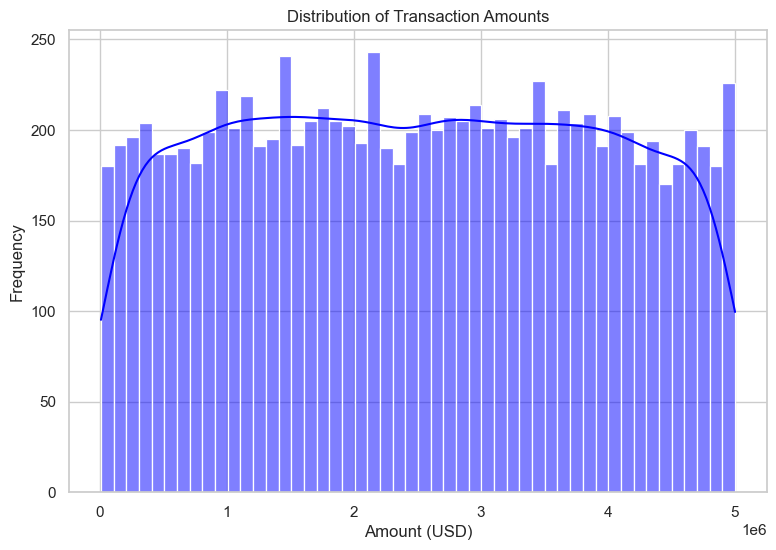

In [11]:
# Distribution of transaction amounts
plt.figure(figsize=(9, 6))
sns.histplot(data['Amount (USD)'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Money Laundering Risk Scores

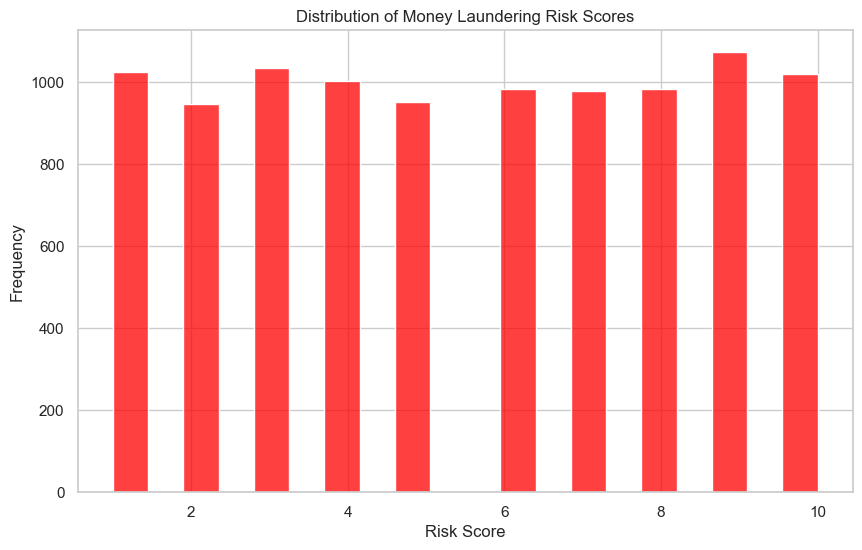

In [13]:
# Distribution of money laundering risk scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Money Laundering Risk Score'], bins=20, color='red')
plt.title('Distribution of Money Laundering Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

# Count of Transactions by Country

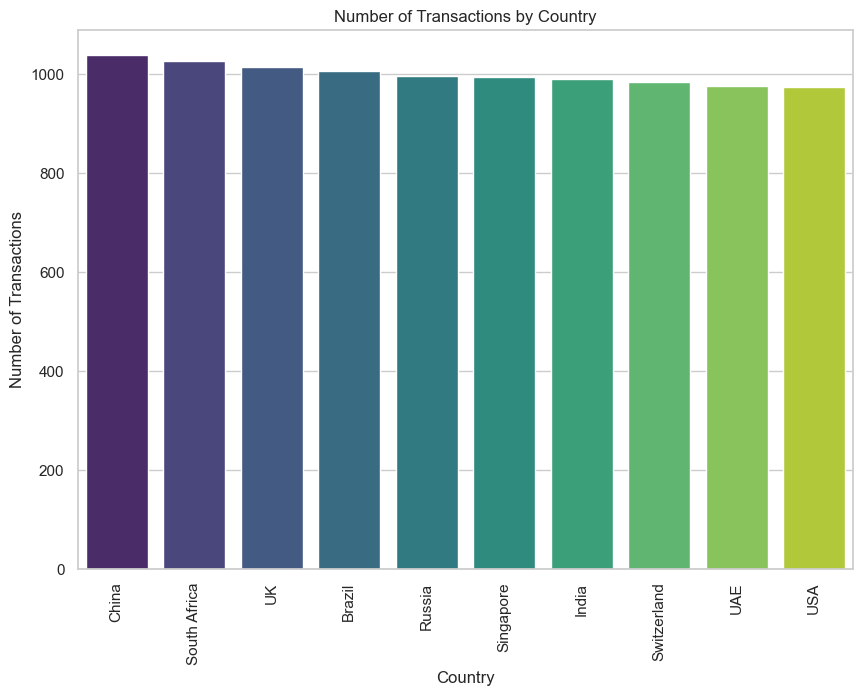

In [14]:
# Count of transactions by country
plt.figure(figsize=(10, 7))
sns.countplot(data=data, x='Country', order=data['Country'].value_counts().index, palette='viridis')
plt.title('Number of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

# Count of Transactions by Transaction Type 

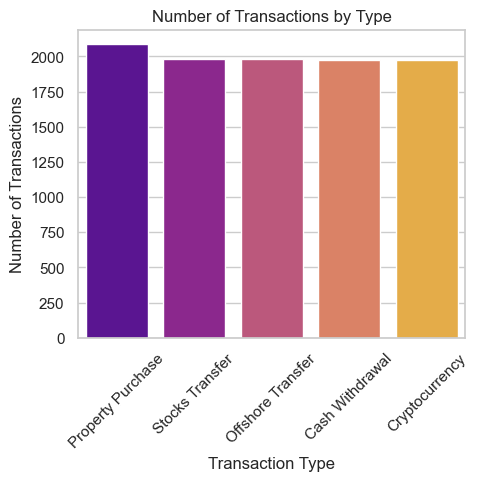

In [17]:
# Count of transactions by transaction type
plt.figure(figsize=(5, 4))
sns.countplot(data=data, x='Transaction Type', order=data['Transaction Type'].value_counts().index, palette='plasma')
plt.title('Number of Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Average Amount by Transaction

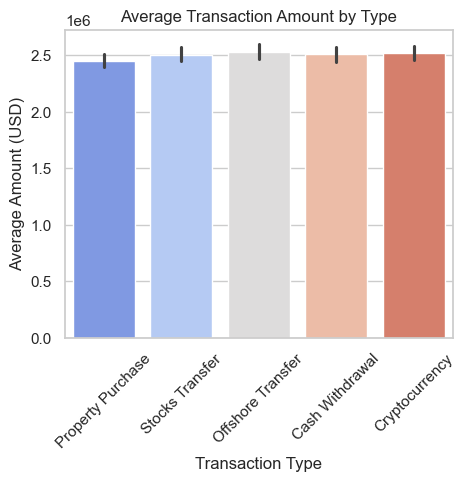

In [18]:
# Average transaction amount by transaction type
plt.figure(figsize=(5, 4))
sns.barplot(data=data, x='Transaction Type', y='Amount (USD)', estimator=np.mean, palette='coolwarm', order=data['Transaction Type'].value_counts().index)
plt.title('Average Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount (USD)')
plt.xticks(rotation=45)
plt.show()

# Count of Reported Transactions by Authority

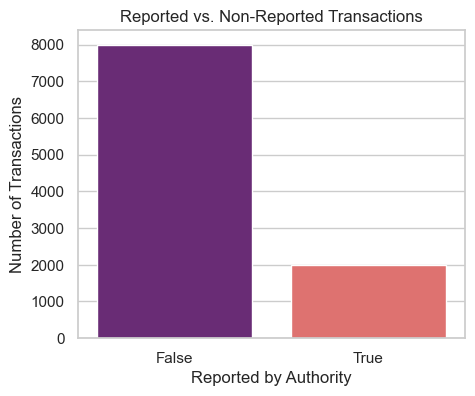

In [19]:
# Count of reported vs. non-reported transactions
plt.figure(figsize=(5, 4))
sns.countplot(data=data, x='Reported by Authority', palette='magma')
plt.title('Reported vs. Non-Reported Transactions')
plt.xlabel('Reported by Authority')
plt.ylabel('Number of Transactions')
plt.show()

# Total Amount by Source of Money

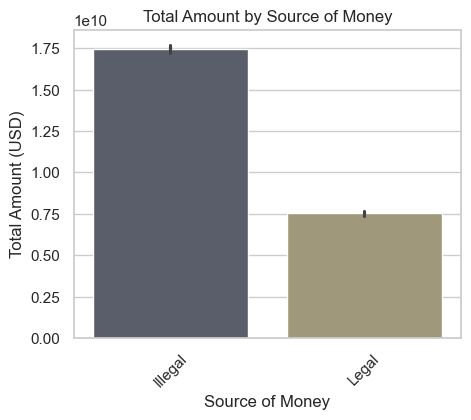

In [20]:
# Total amount by source of money
plt.figure(figsize=(5, 4))
sns.barplot(data=data, x='Source of Money', y='Amount (USD)', estimator=np.sum, palette='cividis', order=data['Source of Money'].value_counts().index)
plt.title('Total Amount by Source of Money')
plt.xlabel('Source of Money')
plt.ylabel('Total Amount (USD)')
plt.xticks(rotation=45)
plt.show()

# Money Laundering Risk Score by Industry

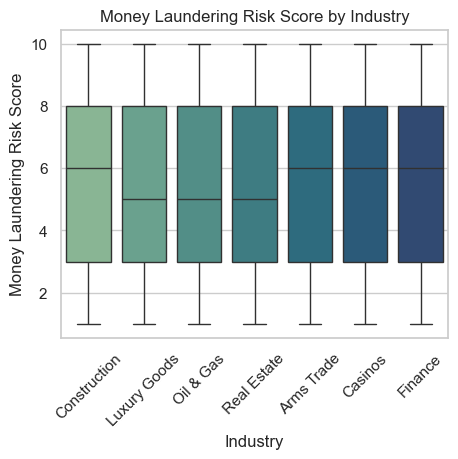

In [21]:
# Money laundering risk score by industry
plt.figure(figsize=(5, 4))
sns.boxplot(data=data, x='Industry', y='Money Laundering Risk Score', palette='crest')
plt.title('Money Laundering Risk Score by Industry')
plt.xlabel('Industry')
plt.ylabel('Money Laundering Risk Score')
plt.xticks(rotation=45)
plt.show()

# Amount Distribution by Reported Authority Status

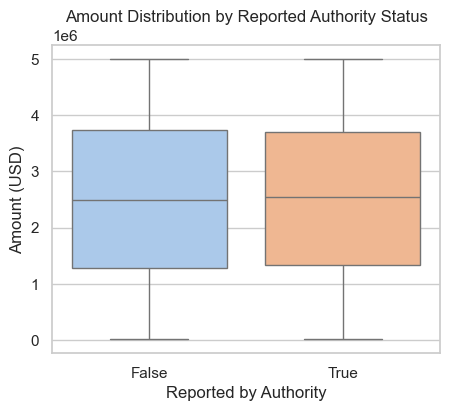

In [22]:
# Amount distribution by reported authority status
plt.figure(figsize=(5, 4))
sns.boxplot(data=data, x='Reported by Authority', y='Amount (USD)', palette='pastel')
plt.title('Amount Distribution by Reported Authority Status')
plt.xlabel('Reported by Authority')
plt.ylabel('Amount (USD)')
plt.show()

# Count of Transactions by Destination Country

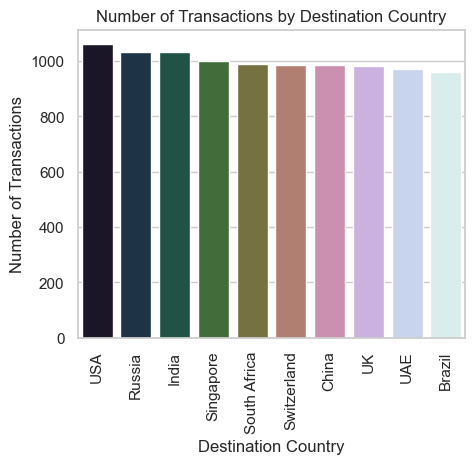

In [23]:
# Count of transactions by destination country
plt.figure(figsize=(5, 4))
sns.countplot(data=data, x='Destination Country', order=data['Destination Country'].value_counts().index, palette='cubehelix')
plt.title('Number of Transactions by Destination Country')
plt.xlabel('Destination Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

# Total Amount by Tax Haven Country

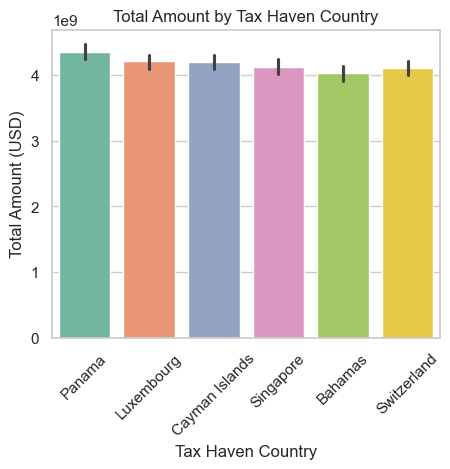

In [24]:
# Total amount by tax haven country
plt.figure(figsize=(5, 4))
sns.barplot(data=data, x='Tax Haven Country', y='Amount (USD)', estimator=np.sum, palette='Set2', order=data['Tax Haven Country'].value_counts().index)
plt.title('Total Amount by Tax Haven Country')
plt.xlabel('Tax Haven Country')
plt.ylabel('Total Amount (USD)')
plt.xticks(rotation=45)
plt.show()

# Transactions by Shell Companies Involved 

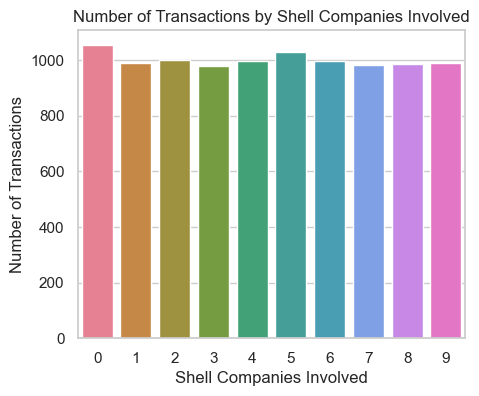

In [25]:
# Count of transactions by number of shell companies involved
plt.figure(figsize=(5, 4))
sns.countplot(data=data, x='Shell Companies Involved', palette='husl')
plt.title('Number of Transactions by Shell Companies Involved')
plt.xlabel('Shell Companies Involved')
plt.ylabel('Number of Transactions')
plt.show()

# Average Amount by Shell Companies Involved 

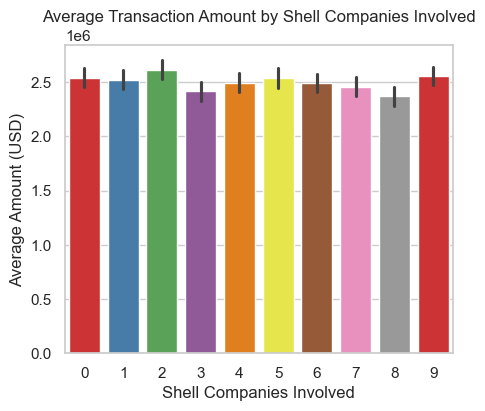

In [26]:
# Average transaction amount by number of shell companies involved
plt.figure(figsize=(5, 4))
sns.barplot(data=data, x='Shell Companies Involved', y='Amount (USD)', estimator=np.mean, palette='Set1')
plt.title('Average Transaction Amount by Shell Companies Involved')
plt.xlabel('Shell Companies Involved')
plt.ylabel('Average Amount (USD)')
plt.show()

# Correlation Matrix

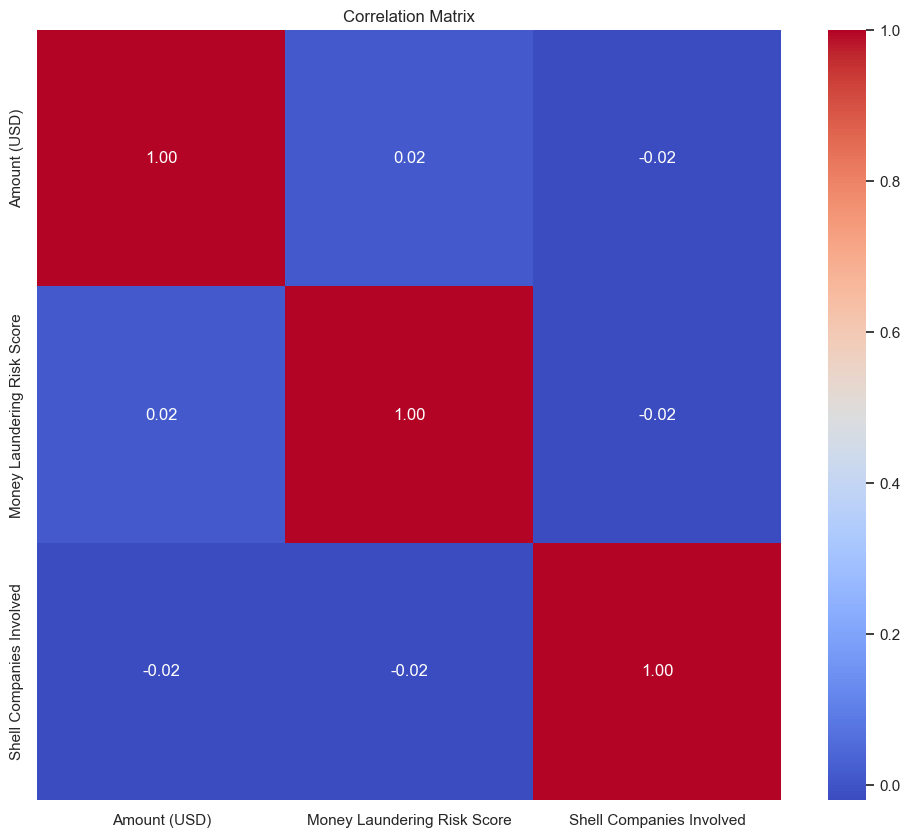

In [27]:
# Correlation matrix of numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = data[['Amount (USD)', 'Money Laundering Risk Score', 'Shell Companies Involved']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Time Series Analysis of Transactions

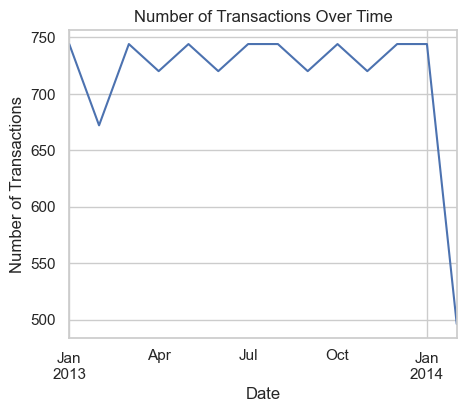

In [28]:
# Convert 'Date of Transaction' to datetime format
data['Date of Transaction'] = pd.to_datetime(data['Date of Transaction'])
# Time series analysis of transactions over time
plt.figure(figsize=(5, 4))
data.groupby(data['Date of Transaction'].dt.to_period('M')).size().plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# Transaction Amounts Over Time

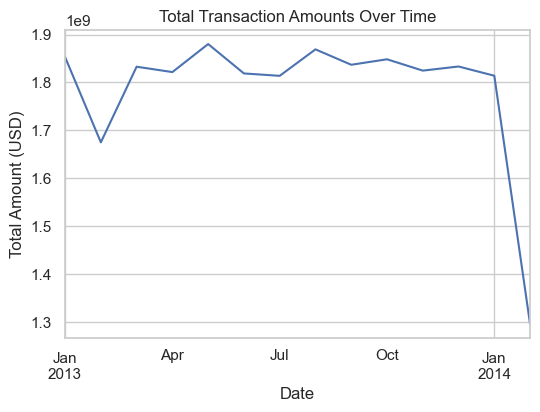

In [30]:
# Aggregate total transaction amounts over time
plt.figure(figsize=(6, 4))
data.groupby(data['Date of Transaction'].dt.to_period('M'))['Amount (USD)'].sum().plot()
plt.title('Total Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount (USD)')
plt.show()

# Pie Chart of All Transaction Types

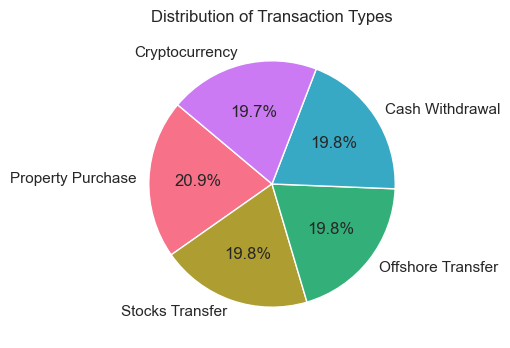

In [32]:
# Pie chart of transaction types
plt.figure(figsize=(6, 4))
data['Transaction Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('husl', n_colors=data['Transaction Type'].nunique()))
plt.title('Distribution of Transaction Types')
plt.ylabel('')
plt.show()

# Boxplot of Amounts by Transaction Type

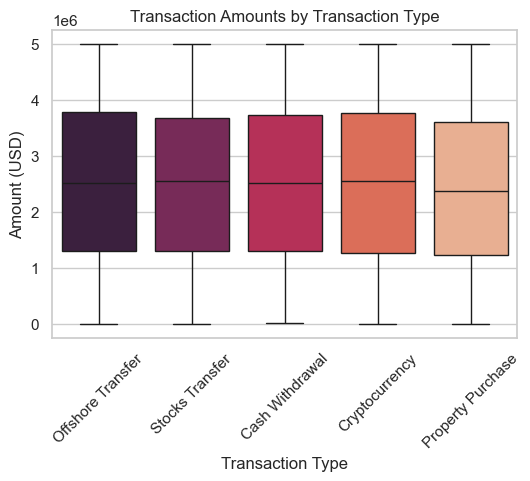

In [33]:
# Boxplot of transaction amounts by transaction type
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Transaction Type', y='Amount (USD)', palette='rocket')
plt.title('Transaction Amounts by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45)
plt.show()

# Histogram of Money Laundering Risk Scores by Country

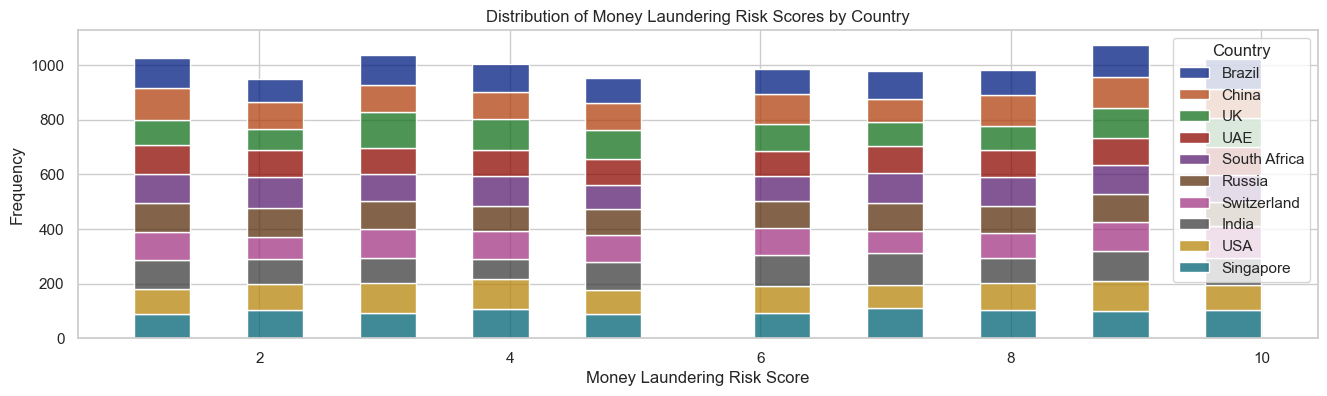

In [35]:
# Histogram of money laundering risk scores by country
plt.figure(figsize=(16, 4))
sns.histplot(data=data, x='Money Laundering Risk Score', hue='Country', multiple='stack', palette='dark')
plt.title('Distribution of Money Laundering Risk Scores by Country')
plt.xlabel('Money Laundering Risk Score')
plt.ylabel('Frequency')
plt.show()

# Heatmap of Amounts and Risk Scores

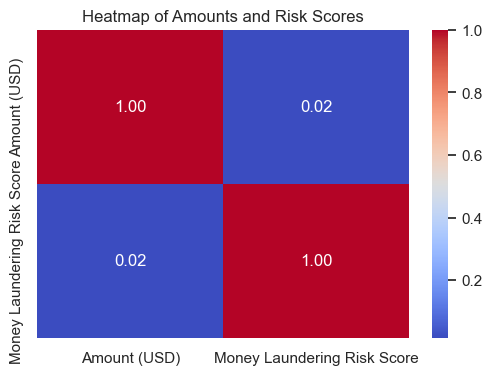

In [38]:
# Heatmap of transaction amounts and risk scores
plt.figure(figsize=(6, 4))
heatmap_data = data[['Amount (USD)', 'Money Laundering Risk Score']]
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Amounts and Risk Scores')
plt.show()

# Industry vs. Risk Score

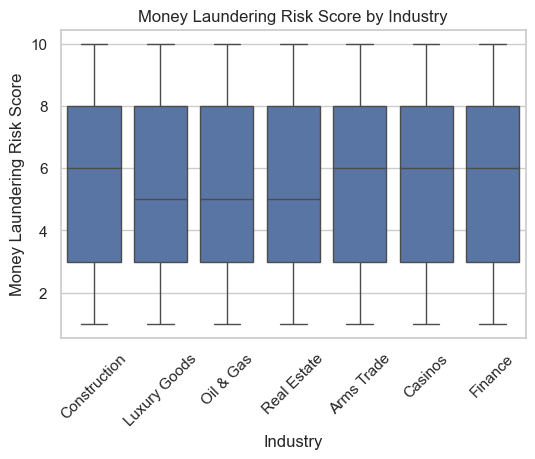

In [39]:
# Boxplot of money laundering risk score by industry
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Industry', y='Money Laundering Risk Score')
plt.title('Money Laundering Risk Score by Industry')
plt.xlabel('Industry')
plt.ylabel('Money Laundering Risk Score')
plt.xticks(rotation=45)
plt.show()

# Scatter Plot of Amount vs. Risk Score

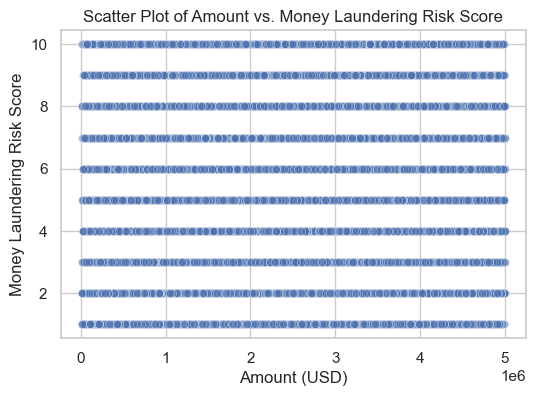

In [41]:
# Scatter plot of amount vs. money laundering risk score
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='Amount (USD)', y='Money Laundering Risk Score', alpha=0.5)
plt.title('Scatter Plot of Amount vs. Money Laundering Risk Score')
plt.xlabel('Amount (USD)')
plt.ylabel('Money Laundering Risk Score')
plt.show()

# Scatter Plot of Amount vs. Number of Shell Companies Involved

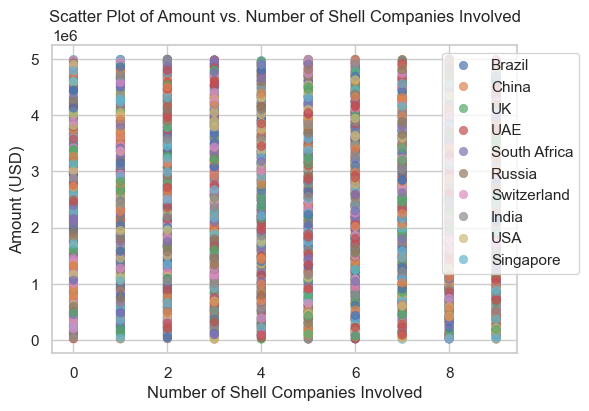

In [43]:
# Scatter plot of Amount vs. Number of Shell Companies Involved
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='Shell Companies Involved', y='Amount (USD)', hue='Country', palette='deep', alpha=0.7, edgecolor=None)
plt.title('Scatter Plot of Amount vs. Number of Shell Companies Involved')
plt.xlabel('Number of Shell Companies Involved')
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

# Faceted Scatter Plots of Amount vs. Risk Score by Transaction Type

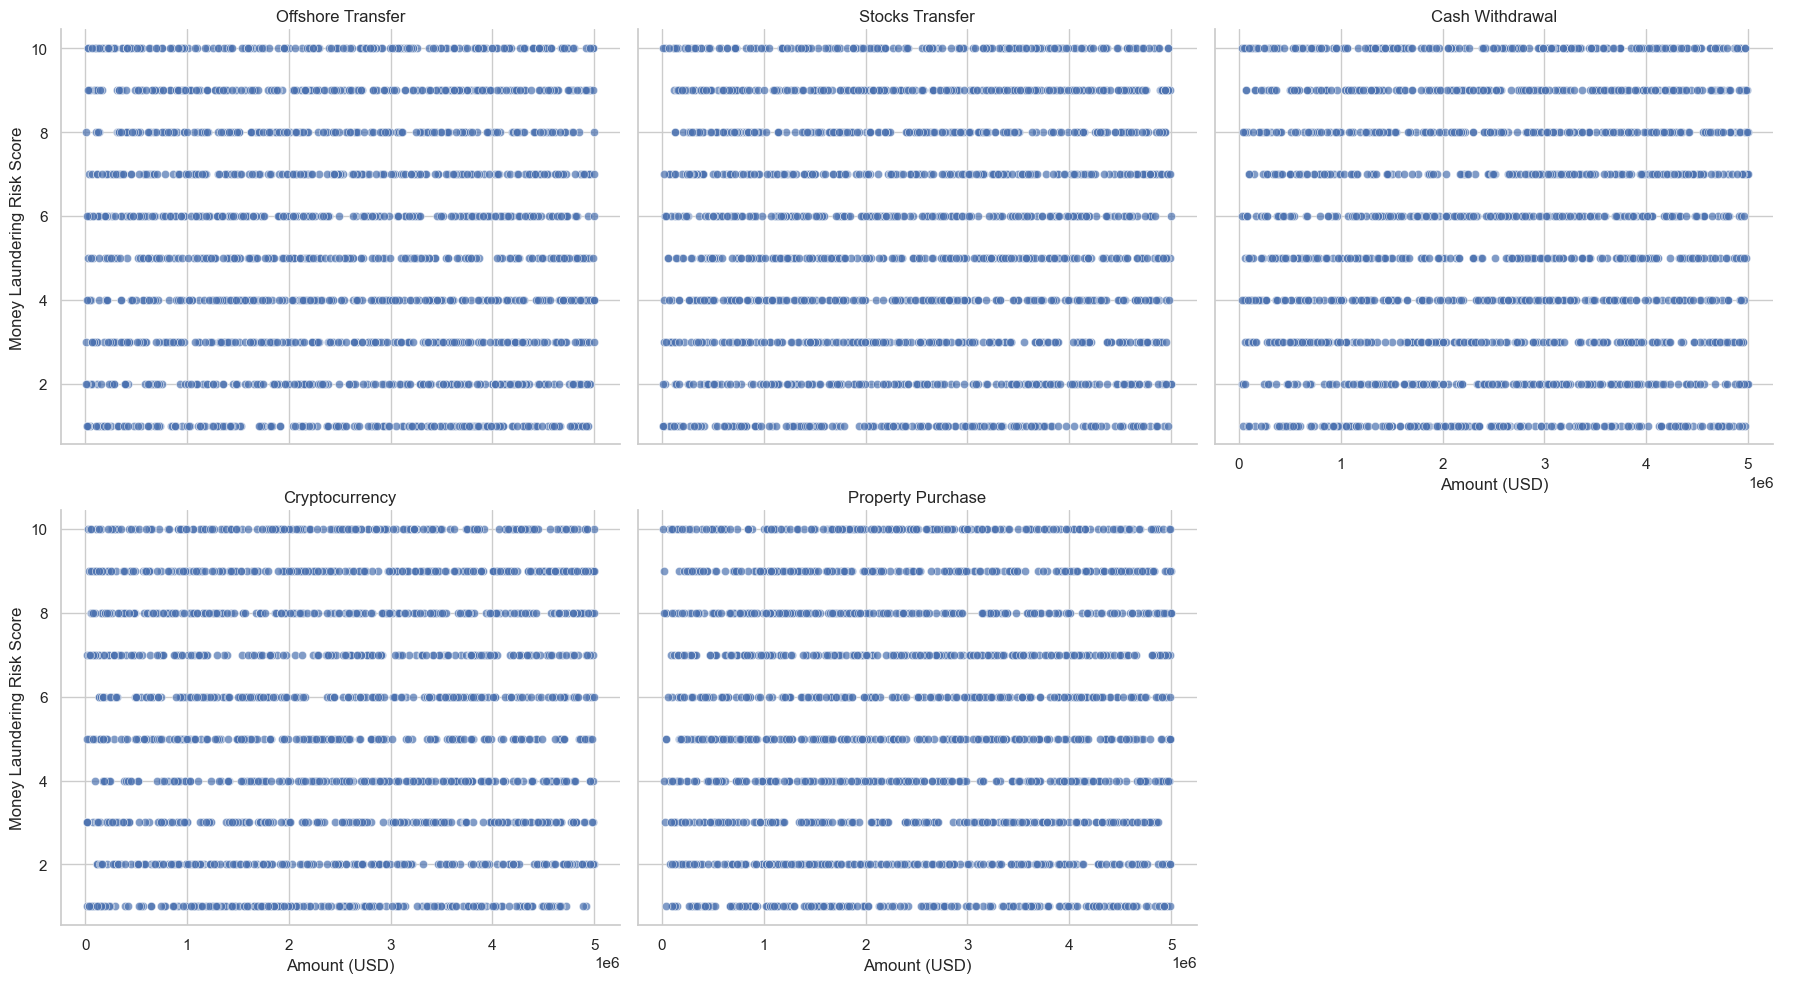

In [44]:
# Faceted scatter plots of Amount vs. Risk Score by Transaction Type
g = sns.FacetGrid(data, col='Transaction Type', col_wrap=3, height=5, aspect=1.2)
g.map(sns.scatterplot, 'Amount (USD)', 'Money Laundering Risk Score', alpha=0.7)
g.add_legend()
g.set_axis_labels('Amount (USD)', 'Money Laundering Risk Score')
g.set_titles(col_template='{col_name}')
plt.show()

# Bubble Chart of Total Amount vs. Risk Score by Country

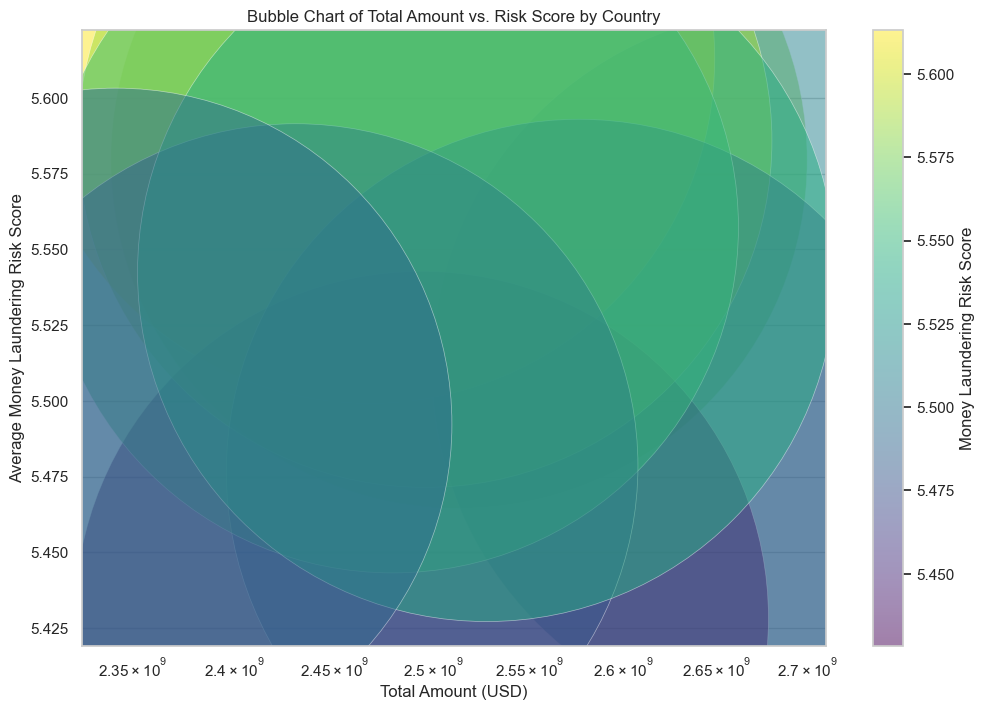

In [4]:
# Bubble chart of total amount vs. money laundering risk score by country
country_summary = data.groupby('Country').agg({'Amount (USD)': 'sum', 'Money Laundering Risk Score': 'mean'}).reset_index()
plt.figure(figsize=(12, 8))
plt.scatter(x=country_summary['Amount (USD)'], 
            y=country_summary['Money Laundering Risk Score'], 
            s=country_summary['Amount (USD)'] / 10000, 
            alpha=0.5, 
            c=country_summary['Money Laundering Risk Score'], 
            cmap='viridis', 
            edgecolors='w', 
            linewidth=0.5)
plt.colorbar(label='Money Laundering Risk Score')
plt.title('Bubble Chart of Total Amount vs. Risk Score by Country')
plt.xlabel('Total Amount (USD)')
plt.ylabel('Average Money Laundering Risk Score')
plt.xscale('log')
plt.show()

# Heatmap of Total Transaction Amount by Country and Destination Country

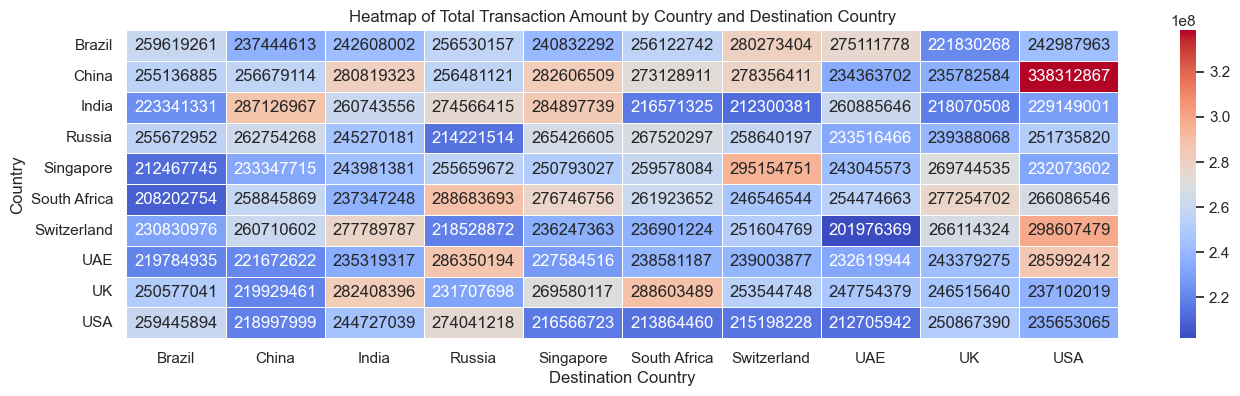

In [6]:
# Heatmap of total transaction amount by Country and Destination Country
pivot_table = data.pivot_table(values='Amount (USD)', index='Country', columns='Destination Country', aggfunc='sum', fill_value=0)
plt.figure(figsize=(16, 4))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Heatmap of Total Transaction Amount by Country and Destination Country')
plt.xlabel('Destination Country')
plt.ylabel('Country')
plt.show()

# Pair Plot of Selected Numerical Features

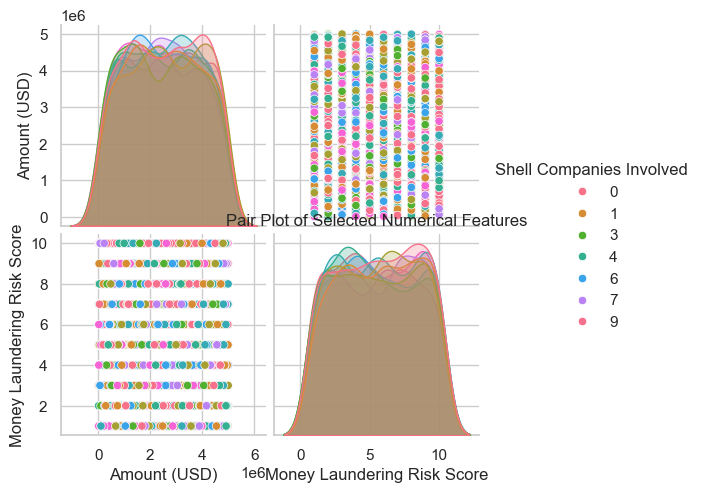

In [7]:
# Pair plot of selected numerical features
selected_features = data[['Amount (USD)', 'Money Laundering Risk Score', 'Shell Companies Involved']]
sns.pairplot(selected_features, diag_kind='kde', hue='Shell Companies Involved', palette='husl')
plt.title('Pair Plot of Selected Numerical Features')
plt.show()

# Scatter Plot of Amount, Risk Score, and Shell Companies

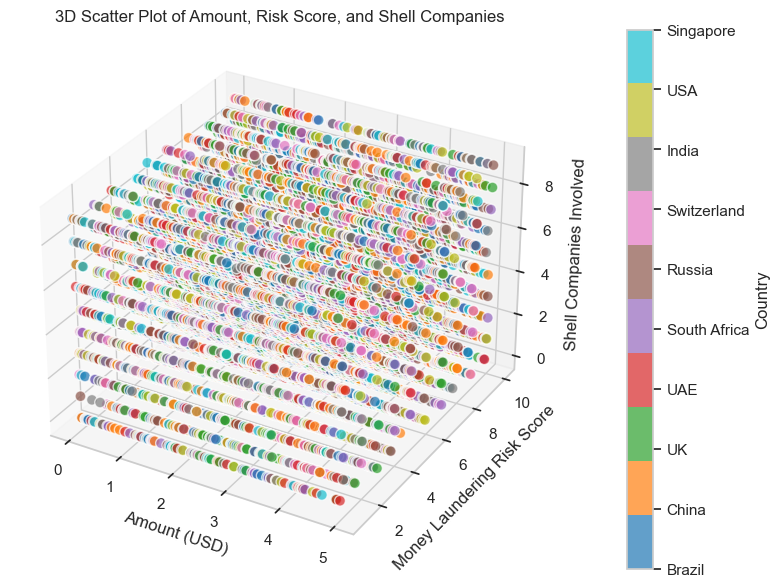

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare data for 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extract columns for the scatter plot
x = data['Amount (USD)']
y = data['Money Laundering Risk Score']
z = data['Shell Companies Involved']
c = data['Country'].astype('category').cat.codes  # Numeric codes for countries

# Create the scatter plot
scatter = ax.scatter(x, y, z, c=c, cmap='tab10', alpha=0.7, edgecolor='w', s=60)

# Create colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Country')
cbar.set_ticks(range(len(data['Country'].unique())))
cbar.set_ticklabels(data['Country'].unique())

# Set labels and title
ax.set_xlabel('Amount (USD)')
ax.set_ylabel('Money Laundering Risk Score')
ax.set_zlabel('Shell Companies Involved')
ax.set_title('3D Scatter Plot of Amount, Risk Score, and Shell Companies')
plt.show()